In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.linalg import svd
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import svds

# Punto 1

In [29]:
gte_df = pd.read_csv('data/GTExdata.csv', low_memory=False)
labels_df = pd.read_csv('data/SampleLabels.csv', low_memory=False)

In [3]:
gte_df.head()

,-0.81443,-0.1728,-0.13566,4.036,3.4742,0.017055,0.76495,3.0281,0.56595,1.9045,...,-0.88508,-2.2228,-3.0385,-2.8584,-3.4724,-2.5374,-2.9705,-1.8397,-2.1044,-1.9881
0,-1.219500,-0.139670,-0.217330,-1.4361,-0.86158,0.403280,-0.91309,6.9136,4.38540,6.15440,...,2.01310,1.25060,0.333560,0.37651,-0.086984,0.221580,1.205700,0.81913,0.20093,1.371100
1,-0.010044,-0.042155,0.111440,-1.0768,-0.72246,0.651900,-0.79763,5.6678,2.94680,4.63420,...,-1.07800,-0.52936,-0.989140,-3.10870,-3.262500,-1.159200,0.091823,-1.14740,-1.59540,-0.092996
2,-1.336400,-0.088622,-0.126460,-1.7866,-0.99562,0.009797,-1.05550,6.5985,4.22730,6.02260,...,0.67228,0.98691,0.142270,0.34028,-0.129170,0.064783,1.279200,1.05850,0.63342,1.581000
3,-1.055100,-0.065230,-0.087368,-1.4559,-0.69961,0.205960,-0.83905,6.1986,4.05600,5.78430,...,0.48401,0.63014,0.061371,-0.82861,-1.537200,-0.121850,0.735520,0.32366,-0.54558,0.789580
4,-0.538700,-0.184340,-0.266680,-1.8266,-0.79040,0.593780,-0.79899,-1.7453,-0.25312,-0.47961,...,-0.22813,1.03090,1.608100,1.59950,1.478600,2.137100,0.563560,0.11520,-0.21623,0.675090


In [30]:
labels_df.head()

,Sampleid,Tissue type specific,Tissue type
0,GTEX-N7MS-0007-SM-2D7W1,Whole Blood,Blood
1,GTEX-N7MS-0011-R10A-SM-2HMJK,Brain - Frontal Cortex (BA9),Brain
2,GTEX-N7MS-0011-R11A-SM-2HMJS,Brain - Cerebellar Hemisphere,Brain
3,GTEX-N7MS-0011-R1a-SM-2HMJG,Brain - Hippocampus,Brain
4,GTEX-N7MS-0011-R2a-SM-2HML6,Brain - Substantia nigra,Brain


## a. Graficar la energía acumulada en función de la cantidad de autovalores, y graficar los autovalores del set.

In [64]:
u, s, vt = svd(gte_df)

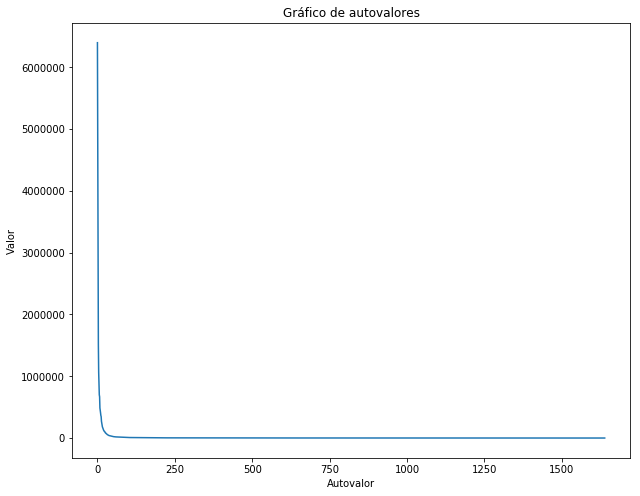

In [65]:
plt.figure(figsize=[10,8])
#  Elevo al cuadrado los valores singulares para obtener los autovalores, ya que es lo que se pide en la consigna. 
autovalores = [x**2 for x in s]
plt.plot(autovalores)
plt.xlabel('Autovalor')
plt.ylabel('Valor')
plt.title('Gráfico de autovalores')
plt.show()

In [8]:
energia_total = sum(s**2)
porcentajes_energia = ((autovalores / energia_total) * 100)

In [9]:
energia_acumulada = 0
ea_por_valor = []
for i in range(len(porcentajes_energia)):
    energia_acumulada = energia_acumulada + porcentajes_energia[i]
    ea_por_valor.append(energia_acumulada)

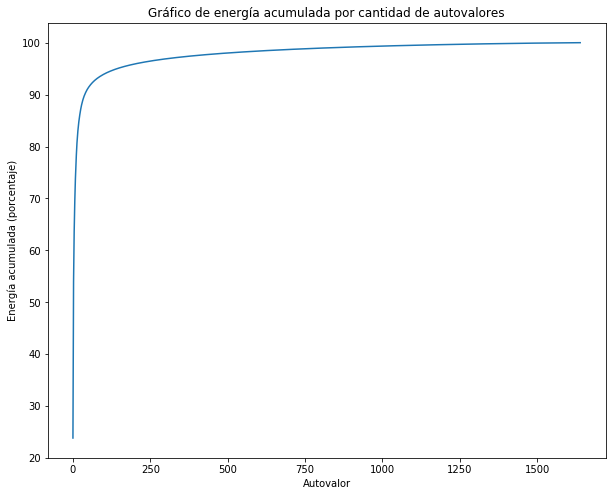

In [10]:
plt.figure(figsize=[10,8])
plt.plot(ea_por_valor)
plt.xlabel('Autovalor')
plt.ylabel('Energía acumulada (porcentaje)')
plt.title('Gráfico de energía acumulada por cantidad de autovalores')
plt.show()

Pasemos a un dataframe (horrendo) la energía acumulada, así vemos a partir de qué **k** se obtiene 90% (lo cual me parece un buen valor para aproximar).

In [11]:
pd.DataFrame(ea_por_valor).head(60)

,0
0,23.836360
1,41.114239
2,53.965699
3,59.619525
4,63.579842
5,66.917810
6,69.522987
7,72.010927
8,73.822659
9,75.462427


## b. Con los dos gráficos anteriores, indicar qué valor de k se podría utilizar para realizar una aproximación.

Vemos que a partir de `k = 48`ya se puede hacer una aproximación _decente_, con el 91% de la energía.
Esto mismo se puede observar en el gráfico anterior (si es que aún se recuerda luego de este _longFrame_), que a partir de ese valor de **k** hay un salto importante de energía.

## c. Realizar una reducción a dos dimensiones del set de datos y graficar los puntos en un scatter-plot utilizando colores para indicar el label correspondiente a cada punto.

In [21]:
u, s, vt = svds(gte_df, 2)

In [26]:
df_u = pd.DataFrame(u)

In [31]:
df_u = df_u.join(labels_df[['Tissue type']])
df_u.rename(columns={0:'col1', 1:'col2'}, inplace=True)

In [34]:
df_u.head()

,col1,col2,Tissue type
0,-0.051592,-0.007036,Blood
1,-0.047175,-0.010368,Brain
2,-0.049459,-0.006154,Brain
3,-0.042320,-0.007938,Brain
4,-0.053442,-0.007425,Brain


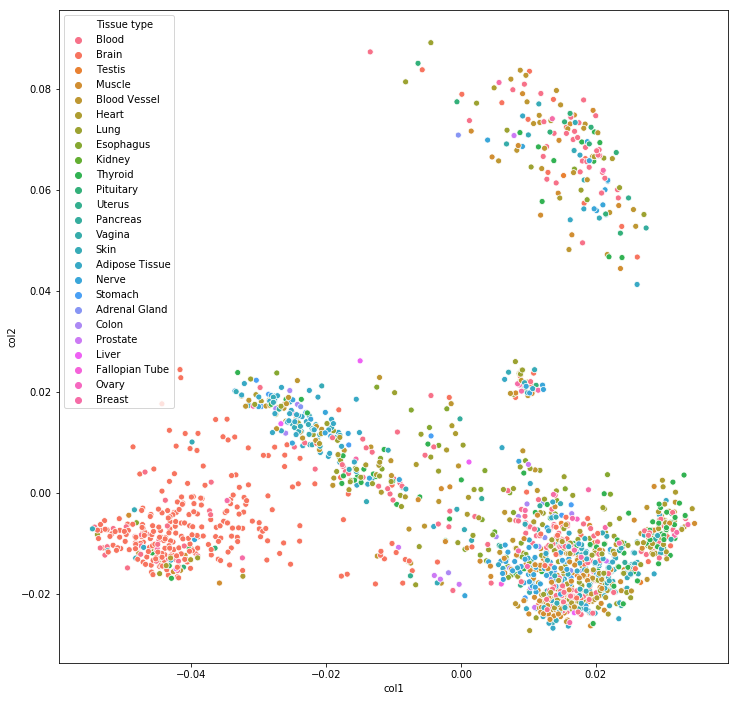

In [39]:
plt.figure(figsize=[12,12])
g = sns.scatterplot(x='col1', y='col2', data=df_u, hue='Tissue type')

# Punto 2

In [37]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE(n_components=2, perplexity=3)
perplexity_3 = tsne.fit_transform(gte_df.values)

In [44]:
df_perp_3 = pd.DataFrame(perplexity_3)
df_perp_3 = df_perp_3.join(labels_df[['Tissue type']])
df_perp_3.rename(columns={0:'col1', 1:'col2'}, inplace=True)

Text(0.5,1,'TSNE con Perplexity 3')

<Figure size 864x864 with 0 Axes>

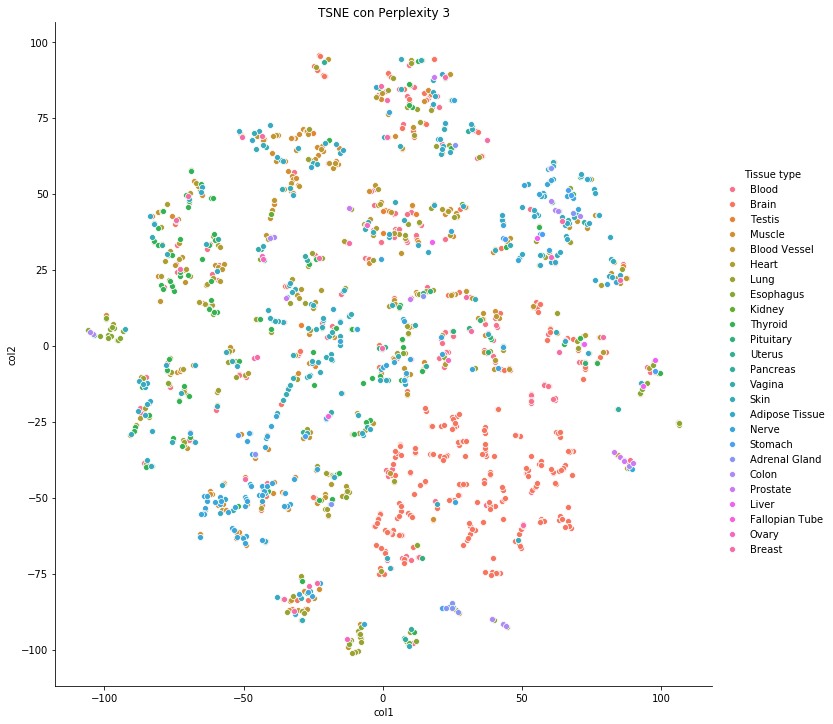

In [50]:
g = sns.pairplot(x_vars='col1', y_vars='col2', data=df_perp_3, hue='Tissue type', height=10)
plt.title('TSNE con Perplexity 3')

In [51]:
tsne = TSNE(n_components=2, perplexity=30)
perplexity_30 = tsne.fit_transform(gte_df.values)

In [52]:
df_perp_30 = pd.DataFrame(perplexity_30)
df_perp_30 = df_perp_30.join(labels_df[['Tissue type']])
df_perp_30.rename(columns={0:'col1', 1:'col2'}, inplace=True)

Text(0.5,1,'TSNE con Perplexity 30')

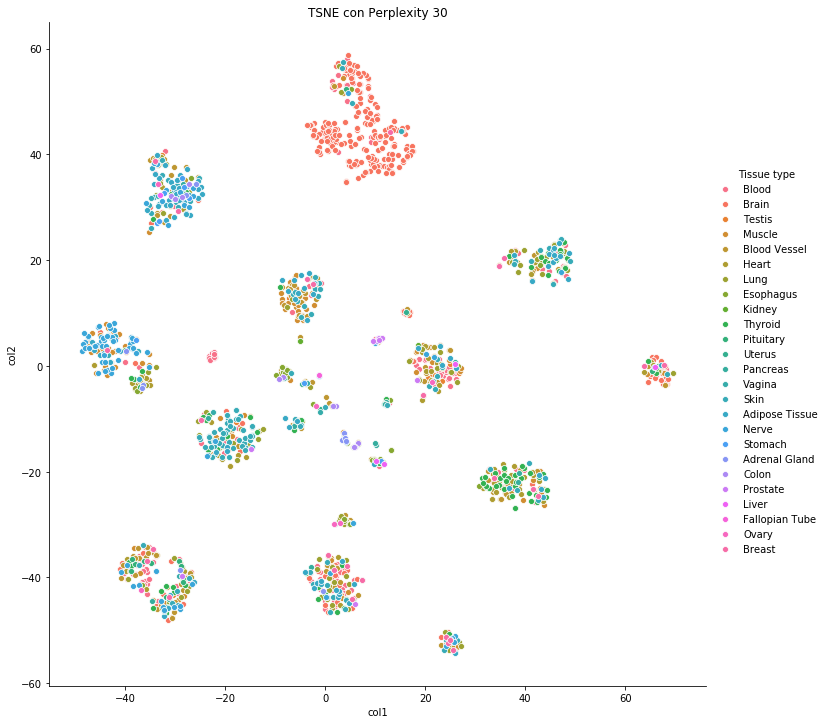

In [53]:
g = sns.pairplot(x_vars='col1', y_vars='col2', data=df_perp_30, hue='Tissue type', height=10)
plt.title('TSNE con Perplexity 30')

In [60]:
tsne = TSNE(n_components=2, perplexity=1000)
perplexity_1000 = tsne.fit_transform(gte_df.values)

In [61]:
df_perp_1000 = pd.DataFrame(perplexity_1000)
df_perp_1000 = df_perp_1000.join(labels_df[['Tissue type']])
df_perp_1000.rename(columns={0:'col1', 1:'col2'}, inplace=True)

Text(0.5,1,'TSNE con Perplexity 1000')

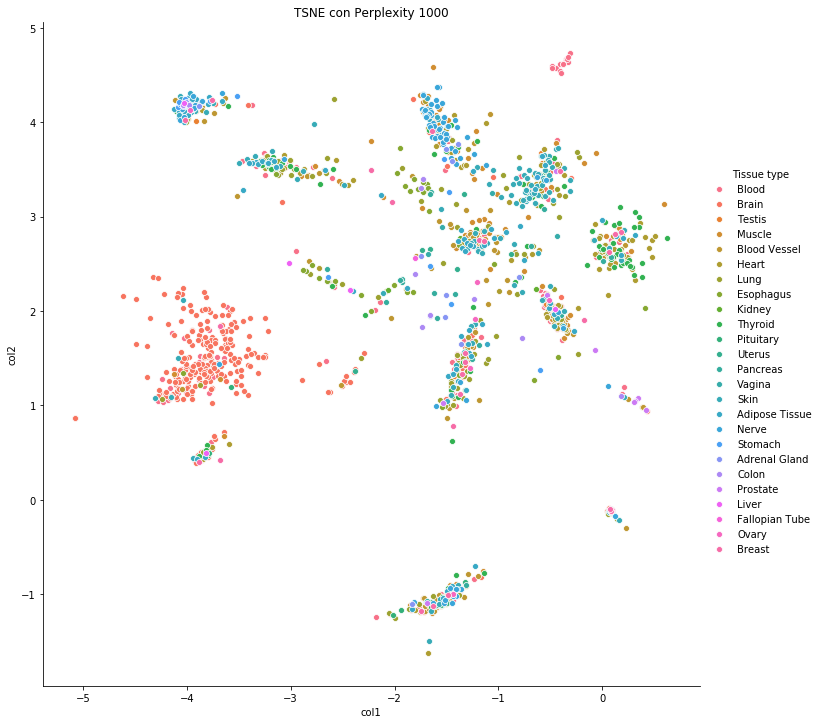

In [62]:
g = sns.pairplot(x_vars='col1', y_vars='col2', data=df_perp_1000, hue='Tissue type', height=10)
plt.title('TSNE con Perplexity 1000')

El incremento de 3 a 30 en el valor de `perplexity` pareciera hacer que los puntos pasen de estar sumamente dispersos, a formar clusters claros y los datos ya no están dispersos (duh).

El incremento a 1000 hace que los grupos tomen formas bastante distintas, y creo que no se puede apreciar tan bien los clusters como con el valor seteado en 30 (pero tal vez esté equivocado y la falta de sueño/comprensión me lleve a conclusiones erróneas `¯\_(ツ)_/¯` )